Data Exploration

Plotting a sample image with bounding boxes

In [8]:
import cv2
import matplotlib.pyplot as plt
import os
img_nm = "solarpanels_native_1__x0_0_y0_6845_dxdy_416"
image_path = f"/teamspace/studios/this_studio/data/images/{img_nm}.tif"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_h, img_w, _ = image.shape



function for seperating the class and x,y,w,h from the txt files

In [3]:
def read_yolo_labels(file_path):
  labels = []
  classes = []
  with open(file_path , 'r') as file:
    for line in file:
      parts = line.strip().split()
      if len(parts) == 5:
        classes.append(float(parts[0]))
        labels.append((float(parts[1]) , float(parts[2]) , float(parts[3]) , float(parts[4])))
  return classes , labels

In [4]:
label_path = f"/teamspace/studios/this_studio/data/labels/{img_nm}.txt"

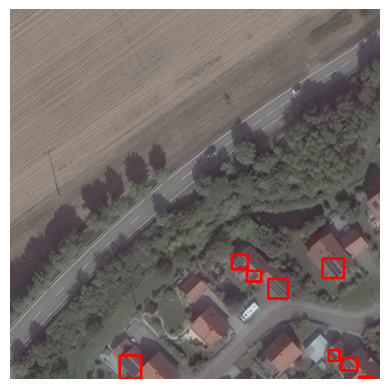

In [5]:
_,labels = read_yolo_labels(label_path)

for x, y, w, h in labels:
    x_center, y_center = int(x * img_w), int(y * img_h)
    box_w, box_h = int(w * img_w), int(h * img_h)
    x1 = x_center - box_w // 2
    y1 =  y_center - box_h // 2 
    x2 = x_center + box_w // 2
    y2 = y_center + box_h // 2  
    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2) 

plt.imshow(image)
plt.axis("off")
plt.show()

In [6]:
len(labels)

8

Making a Pandas dataframe for further Anaylsis

In [7]:
import pandas as pd
label_df = pd.DataFrame(columns=['name', 'labels', 'classes'])

In [8]:
label_dir = "/teamspace/studios/this_studio/data/labels"

In [9]:
import os
from tqdm import tqdm
i = 0
for label_path in tqdm(os.listdir(label_dir) , desc = 'Processing df'):
  label_full_path = os.path.join(label_dir, label_path)
  category , labels = read_yolo_labels(label_full_path)
  label_df.loc[i] = [os.path.splitext(label_path)[0], list(labels), list(category)]
  i += 1

Processing df:  10%|█         | 258/2542 [00:00<00:02, 863.56it/s]

Processing df: 100%|██████████| 2542/2542 [00:03<00:00, 820.34it/s]


In [11]:
label_df.head()

Unnamed: 0                                         name  \
0           0  solarpanels_native_1__x0_0_y0_6845_dxdy_416   
1           1  solarpanels_native_1__x0_0_y0_6963_dxdy_416   
2           2  solarpanels_native_1__x0_0_y0_7119_dxdy_416   
3           3  solarpanels_native_1__x0_0_y0_7229_dxdy_416   
4           4  solarpanels_native_1__x0_0_y0_7230_dxdy_416   

                                              labels  \
0  [(0.8725961538461539, 0.7007211538461539, 0.05...   
1  [(0.8725961538461539, 0.4170673076923077, 0.05...   
2  [(0.8725961538461539, 0.042067307692307696, 0....   
3  [(0.875, 0.013221153846153848, 0.0288461538461...   
4  [(0.875, 0.01201923076923077, 0.02884615384615...   

                                             classes  
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, ...

In [12]:
len(label_df)

2542

In [13]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2542 non-null   int64 
 1   name        2542 non-null   object
 2   labels      2542 non-null   object
 3   classes     2542 non-null   object
dtypes: int64(1), object(3)
memory usage: 79.6+ KB


In [13]:
len(os.listdir('/teamspace/studios/this_studio/data/images'))

2553

In [14]:
len(os.listdir('/teamspace/studios/this_studio/data/labels'))

2542

Since there are some images with no corresponding labels so we have to remove them

In [15]:
import os
images_dir = "/teamspace/studios/this_studio/data/images"
labels_dir = "/teamspace/studios/this_studio/data/labels"
image_files = os.listdir(images_dir)
label_files = os.listdir(labels_dir)
label_names = {os.path.splitext(label)[0] for label in label_files}
for image in image_files:
    image_name, image_ext = os.path.splitext(image)  
    if image_name not in label_names:
        image_path = os.path.join(images_dir, image)
        os.remove(image_path)
        print(f"Deleted: {image_path}")

print("Processing complete.")


Deleted: /teamspace/studios/this_studio/data/images/solarpanels_native_1__x0_7962_y0_8558_dxdy_416(1).tif
Deleted: /teamspace/studios/this_studio/data/images/solarpanels_native_1__x0_7934_y0_8347_dxdy_416(1).tif
Deleted: /teamspace/studios/this_studio/data/images/solarpanels_native_1__x0_7958_y0_8403_dxdy_416(1).tif
Deleted: /teamspace/studios/this_studio/data/images/solarpanels_native_1__x0_7957_y0_8387_dxdy_416(1).tif
Deleted: /teamspace/studios/this_studio/data/images/solarpanels_native_1__x0_7934_y0_8341_dxdy_416(1).tif
Deleted: /teamspace/studios/this_studio/data/images/solarpanels_native_1__x0_7999_y0_8765_dxdy_416(1).tif
Deleted: /teamspace/studios/this_studio/data/images/solarpanels_native_1__x0_7937_y0_11298_dxdy_416(1).tif
Deleted: /teamspace/studios/this_studio/data/images/solarpanels_native_1__x0_7986_y0_11313_dxdy_416(1).tif
Deleted: /teamspace/studios/this_studio/data/images/solarpanels_native_1__x0_5472_y0_12892_dxdy_416(1).tif
Deleted: /teamspace/studios/this_studio/dat

In [16]:
len(os.listdir('/teamspace/studios/this_studio/data/images'))

2542

Highly imbalanced towards class 0 of solar panels

In [41]:
l_classes = [i for j in label_df['classes'] for i in j]

In [43]:
n_0 = 0
n_1 = 0
n_2 = 0
for i in l_classes:
    if int(i) == 0:
        n_0 += 1
    elif int(i) == 1:
        n_1 += 1
    elif int(i) == 2:
        n_2 += 1
    else:
        print('unknown class encountered')

In [44]:
n_0

29267

In [45]:
n_1

130

In [46]:
n_2

228

plotting function


In [94]:
def plot_labels(df , idx):
  img_dir = "/teamspace/studios/this_studio/data/images/train"
  labels = df.iloc[idx]['labels']
  image_path = os.path.join(img_dir, df.iloc[idx]['name'] + '.tif')
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  img_h, img_w , _ = image.shape
  for x, y, w, h in labels:
    x_center, y_center = int(x * img_w), int(y * img_h)
    box_w, box_h = int(w * img_w), int(h * img_h)
    x1 = x_center - box_w // 2
    y1 =  y_center - box_h // 2 
    x2 = x_center + box_w // 2
    y2 = y_center + box_h // 2  
    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2) 
  plt.imshow(image)
  plt.axis("off")
  plt.show()

No. of solar panels in an image = length of label list corresponding to that image

In [14]:
label_df.iloc[0]['labels']

[(0.8725961538461539,
  0.7007211538461539,
  0.057692307692307696,
  0.05528846153846154),
 (0.6201923076923077,
  0.6826923076923077,
  0.04326923076923077,
  0.038461538461538464),
 (0.7235576923076924,
  0.7548076923076924,
  0.05288461538461539,
  0.05288461538461539),
 (0.875, 0.9350961538461539, 0.028846153846153848, 0.028846153846153848),
 (0.9158653846153847,
  0.9591346153846154,
  0.04326923076923077,
  0.03365384615384616),
 (0.9627403846153847,
  0.9963942307692308,
  0.040865384615384616,
  0.007211538461538462),
 (0.3245192307692308, 0.9663461538461539, 0.057692307692307696, 0.0625),
 (0.6586538461538461, 0.7223557692307693, 0.038461538461538464, 0.03125)]

In [15]:
len(label_df.iloc[0]['labels'])

8

In [16]:
label_df['num_solar_panels'] = label_df['labels'].apply(len)


In [17]:
label_df.head()

Unnamed: 0                                         name  \
0           0  solarpanels_native_1__x0_0_y0_6845_dxdy_416   
1           1  solarpanels_native_1__x0_0_y0_6963_dxdy_416   
2           2  solarpanels_native_1__x0_0_y0_7119_dxdy_416   
3           3  solarpanels_native_1__x0_0_y0_7229_dxdy_416   
4           4  solarpanels_native_1__x0_0_y0_7230_dxdy_416   

                                              labels  \
0  [(0.8725961538461539, 0.7007211538461539, 0.05...   
1  [(0.8725961538461539, 0.4170673076923077, 0.05...   
2  [(0.8725961538461539, 0.042067307692307696, 0....   
3  [(0.875, 0.013221153846153848, 0.0288461538461...   
4  [(0.875, 0.01201923076923077, 0.02884615384615...   

                                             classes  num_solar_panels  
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]                 8  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...                13  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...                18  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, ...                15  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, ...                15

In [18]:
l = [num for num in label_df['num_solar_panels']]
total_inst = sum(l)
print('Total instances of solar panels in the dataset :' , total_inst)

Total instances of solar panels in the dataset : 29625


Extracting more info from the names using the naing convention - name of the dataset, image type, tile identification number, minimum x bound, minimum y bound, and window size.

In [20]:
def more_info(df , idx):
  name = df.iloc[idx]['name']
  parts = name.split('_')
  img_type = parts[1]
  tile_no = int(parts[2])
  x_bound = float(parts[5])
  y_bound = float(parts[7])
  size = int(parts[9].split()[0])
  return img_type , tile_no , x_bound , y_bound , size

In [21]:
print(more_info(label_df,0))

('native', 1, 0.0, 6845.0, 416)


In [22]:
label_df['img_type'] , label_df['tile_no'] , label_df['x_bound'] , label_df['y_bound'] , label_df['size'] = zip(*label_df.apply(lambda row: more_info(label_df, row.name), axis=1))


In [23]:
label_df.head()

Unnamed: 0                                         name  \
0           0  solarpanels_native_1__x0_0_y0_6845_dxdy_416   
1           1  solarpanels_native_1__x0_0_y0_6963_dxdy_416   
2           2  solarpanels_native_1__x0_0_y0_7119_dxdy_416   
3           3  solarpanels_native_1__x0_0_y0_7229_dxdy_416   
4           4  solarpanels_native_1__x0_0_y0_7230_dxdy_416   

                                              labels  \
0  [(0.8725961538461539, 0.7007211538461539, 0.05...   
1  [(0.8725961538461539, 0.4170673076923077, 0.05...   
2  [(0.8725961538461539, 0.042067307692307696, 0....   
3  [(0.875, 0.013221153846153848, 0.0288461538461...   
4  [(0.875, 0.01201923076923077, 0.02884615384615...   

                                             classes  num_solar_panels  \
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]                 8   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...                13   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...                18   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, ...                15   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, ...                15   

  img_type  tile_no  x_bound  y_bound  size  
0   native        1      0.0   6845.0   416  
1   native        1      0.0   6963.0   416  
2   native        1      0.0   7119.0   416  
3   native        1      0.0   7229.0   416  
4   native        1      0.0   7230.0   416

In [24]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2542 non-null   int64  
 1   name              2542 non-null   object 
 2   labels            2542 non-null   object 
 3   classes           2542 non-null   object 
 4   num_solar_panels  2542 non-null   int64  
 5   img_type          2542 non-null   object 
 6   tile_no           2542 non-null   int64  
 7   x_bound           2542 non-null   float64
 8   y_bound           2542 non-null   float64
 9   size              2542 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 198.7+ KB


The pixel coordinates may be translated to geocoordinates using the EPSG:32633 coordinate system and the following geotransform for each tile: (x_origin , x_scale , x_rot , y_origin , y_rot , y_scale)

In [25]:
Tile_1 =  (307670.04, 0.31, 0.0, 5434427.100000001, 0.0, -0.31)
Tile_2 = (312749.07999999996, 0.31, 0.0, 5403952.860000001, 0.0, -0.31)
Tile_3 = (312749.07999999996, 0.31, 0.0, 5363320.540000001, 0.0, -0.31)

Function for computing area of Bounding boxes - Area = (w x size x X_scale) x (h x Size x y_scale)  in metre^2

In [28]:
def area_bbox(df,idx):
  labels = df.iloc[idx]['labels']
  tile_no = df.iloc[idx]['tile_no']
  size = df.iloc[idx]['size']
  _ , x_scale , _ , _ , _ , y_scale = Tile_1 if tile_no == '1' else (Tile_2 if tile_no == '2' else Tile_3)
  all_area = []
  for x,y,w,h in labels:
    area = (float(w)*float(size)*abs(x_scale))*(float(h)*float(size)*abs(y_scale))
    all_area.append(area)
  return all_area




In [29]:
print(area_bbox(label_df,0))

[53.047200000000004, 27.6768, 46.512400000000014, 13.838399999999998, 24.217200000000005, 4.9011, 59.9664, 19.9888]


In [30]:
label_df['bbox_areas'] = label_df.apply(lambda row: area_solar_panels(label_df, row.name), axis=1)

In [33]:
label_df.head()

name  \
0  solarpanels_native_1__x0_0_y0_6845_dxdy_416   
1  solarpanels_native_1__x0_0_y0_6963_dxdy_416   
2  solarpanels_native_1__x0_0_y0_7119_dxdy_416   
3  solarpanels_native_1__x0_0_y0_7229_dxdy_416   
4  solarpanels_native_1__x0_0_y0_7230_dxdy_416   

                                              labels  \
0  [(0.8725961538461539, 0.7007211538461539, 0.05...   
1  [(0.8725961538461539, 0.4170673076923077, 0.05...   
2  [(0.8725961538461539, 0.042067307692307696, 0....   
3  [(0.875, 0.013221153846153848, 0.0288461538461...   
4  [(0.875, 0.01201923076923077, 0.02884615384615...   

                                             classes  num_solar_panels  \
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]                 8   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...                13   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...                18   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, ...                15   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, ...                15   

  img_type  tile_no  x_bound  y_bound  size  \
0   native        1      0.0   6845.0   416   
1   native        1      0.0   6963.0   416   
2   native        1      0.0   7119.0   416   
3   native        1      0.0   7229.0   416   
4   native        1      0.0   7230.0   416   

                                               areas  
0  [53.047200000000004, 27.6768, 46.5124000000000...  
1  [53.047200000000004, 27.6768, 46.5124000000000...  
2  [53.047200000000004, 27.6768, 46.5124000000000...  
3  [12.685200000000002, 24.217200000000005, 34.30...  
4  [11.532, 24.217200000000005, 34.3077, 67.46220...

But since the bounding boxes are not aligned with the solar panels properly in most cases . Therefore Area of bbox != Area of solar panels 

For that we have to use segmentation techniques to identify the area covered by solar panels 

I tried a unet based segmentation model fine tuned on solar panels dataset but since that dataset had larger panels therefore the model performed poorly on this data .The optimal approach would be to first make a segmentation data from the given data using Roboflow (atleast 500) and then fine tune on that data . But due to time constraints I was unable to perform this.

so taking the bounding box area as the panel area for further anaylsis

In [34]:
area_l = [area for areas in label_df['areas'] for area in areas]

In [35]:
area_l

[53.047200000000004,
 27.6768,
 46.512400000000014,
 13.838399999999998,
 24.217200000000005,
 4.9011,
 59.9664,
 19.9888,
 53.047200000000004,
 27.6768,
 46.512400000000014,
 13.838399999999998,
 24.217200000000005,
 34.3077,
 67.46220000000001,
 13.742300000000004,
 10.571000000000002,
 121.086,
 38.055600000000005,
 59.9664,
 19.9888,
 53.047200000000004,
 27.6768,
 46.512400000000014,
 13.838399999999998,
 24.217200000000005,
 34.3077,
 67.46220000000001,
 13.742300000000004,
 10.571000000000002,
 121.086,
 38.055600000000005,
 59.9664,
 34.596000000000004,
 55.25750000000001,
 59.19760000000002,
 126.85200000000003,
 67.27000000000001,
 19.9888,
 12.685200000000002,
 24.217200000000005,
 34.3077,
 67.46220000000001,
 13.742300000000004,
 10.571000000000002,
 121.086,
 38.055600000000005,
 59.9664,
 34.596000000000004,
 55.25750000000001,
 59.19760000000002,
 126.85200000000003,
 67.27000000000001,
 10.571000000000002,
 11.532,
 24.217200000000005,
 34.3077,
 67.46220000000001,
 13

In [36]:
max(area_l)

12177.407600000002

In [37]:
import numpy as np
mean_area = np.mean(area_l)
std_area = np.std(area_l)

In [38]:
mean_area

191.51782786497893

In [39]:
std_area

630.7003355500087

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


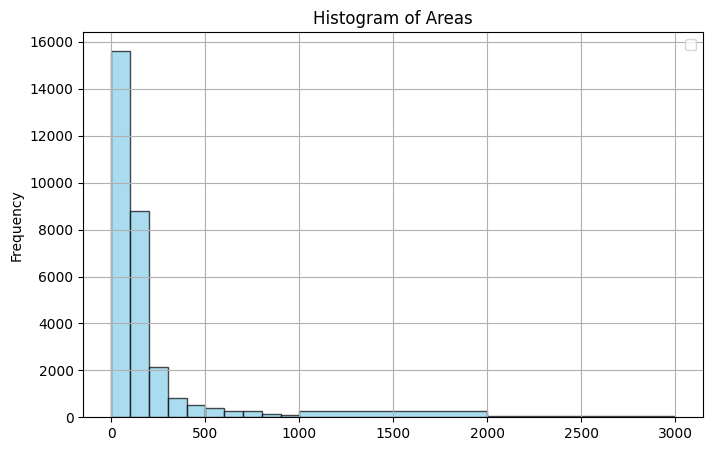

In [40]:
import matplotlib.pyplot as plt
custom_bins = [0,100,200,300,400,500,600,700,800,900,1000,2000,3000]
plt.figure(figsize=(8, 5))
plt.hist(area_l, bins=custom_bins, color='skyblue', edgecolor='black', alpha=0.7)
plt.ylabel('Frequency')
plt.title('Histogram of Areas')
plt.legend()
plt.grid(True)
plt.show()

out of approx 30,000 instances approx 16k have area bw 0-100 m^2

In [81]:
def computing_end_points(bbox):
  x , y  , w , h  = bbox
  x_min = x - w/2
  y_min = y - h/2
  x_max = x + w/2
  y_max = y + h/2
  return x_min , y_min , x_max , y_max

In [75]:
pip install --upgrade supervision


Note: you may need to restart the kernel to use updated packages.


IOU function

In [82]:
from shapely.geometry import box
import numpy as np
import supervision as sv
def iou_shapely(bbox1 , bbox2):
  x_min1 , y_min1 , x_max1 , y_max1 = bbox1
  x_min2 , y_min2 , x_max2 , y_max2 = bbox2
  box1 = box(x_min1 , y_min1 , x_max1 , y_max1)
  box2 = box(x_min2 , y_min2 , x_max2 , y_max2)
  interesection = box1.intersection(box2)
  union = box1.union(box2)
  iou = interesection.area / union.area
  return iou

In [83]:
bbox1 = (0.5 , 0.5 , 0.5 , 0.5)
bbox2 = (0.75 , 0.75 , 0.5 , 0.5)
iou1 = iou_shapely(computing_end_points(bbox1) , computing_end_points(bbox2))

In [85]:
iou1

0.14285714285714285

In [5]:
bbox_arr1 = np.array([computing_end_points(bbox1)])
bbox_arr2 = np.array([computing_end_points(bbox2)])
iou_matrix = sv.box_iou_batch(bbox_arr1, bbox_arr2)

In [6]:
iou_matrix

array([[0.14285714]])

both IOU computed from my function and using supervision are same

In [54]:
pr_re_1 = [(0,0),(1,0.25) , (0.5 , 0.25) , (0.667 , 0.5) , (0.5 , 0.5) , (0.6 , 0.75) , (0.5 , 0.75)]

In [55]:
def pascal_11_point(pr_re):
  recall = [0 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.0]
  sum_pr = 0
  for i in recall:
    max_pr = 0
    for j in pr_re:
      if j[1] >= i and j[0] > max_pr:
        max_pr = j[0]
    sum_pr += max_pr
  return sum_pr/11


In [56]:
print(pascal_11_point(pr_re_1))

0.5637272727272726


In [57]:
def coco_101_point(pr_re):
  recall = np.linspace(0.0 , 1.0 , 101)
  sum_pr = 0
  for i in recall:
    max_pr = 0
    for j in pr_re:
      if j[1] >= i and j[0] > max_pr:
        max_pr = j[0]
    sum_pr += max_pr
  return sum_pr/101

In [58]:
print(coco_101_point(pr_re_1))

0.5710396039603968


In [59]:
def area_under_curve(pr_re):
  total_area = 0
  for i in range(len(pr_re)-1):
    width = pr_re[i+1][1] - pr_re[i][1]
    height = max(pr_re[i][0] , pr_re[i+1][0])
    area = width * height
    total_area += area
  return total_area

In [60]:
print(area_under_curve(pr_re_1))

0.56675


In [61]:
import random
def generate_boxes(image_size , box_size , num_boxes , pred = False):
  boxes = {0:[]}
  for i in range(num_boxes):
    x_min = random.randint(0,image_size-box_size)
    y_min = random.randint(0,image_size-box_size)
    x_max = x_min + box_size
    y_max = y_min + box_size
    if pred == True:
      boxes[0].append([x_min , y_min , x_max , y_max , 1])
    else:
      boxes[0].append([x_min , y_min , x_max , y_max ])
  return boxes

In [62]:
def comp_prec_rec(det_boxes , gt_boxes , iou_threshold ):
    gt_labels = {cls_key for i in gt_boxes for cls_key in i.keys()}
    precisions = {}
    recalls = {}
    f1_scores = {}
    for idx, label in enumerate(gt_labels):
        cls_dets = [ [im_idx, im_dets_label] for im_idx, im_dets in enumerate(det_boxes) if label in im_dets for im_dets_label in im_dets[label]]
        cls_dets = sorted(cls_dets, key=lambda k: k[1][-1] , reverse = True)
        gt_matched = [[False for _ in im_gts[label]] for im_gts in gt_boxes]
        num_gts = sum([len(im_gts[label]) for im_gts in gt_boxes])
        tp = [0] * len(cls_dets)
        fp = [0] * len(cls_dets)
        for det_idx, (im_idx, det_pred) in enumerate(cls_dets):
            im_gts = gt_boxes[im_idx][label]
            max_iou_found = -1
            max_iou_gt_idx = -1
            for gt_box_idx, gt_box in enumerate(im_gts):
                gt_box_iou = iou_shapely(det_pred[:-1], gt_box)
                if gt_box_iou > max_iou_found:
                    max_iou_found = gt_box_iou
                    max_iou_gt_idx = gt_box_idx
            if max_iou_found < iou_threshold or gt_matched[im_idx][max_iou_gt_idx]:
                fp[det_idx] = 1
            else:
                tp[det_idx] = 1
                gt_matched[im_idx][max_iou_gt_idx] = True
        tp = np.cumsum(tp)
        fp = np.cumsum(fp)
        recall = tp / num_gts
        precision = tp / (tp + fp)
        f1_score = 2 * (precision * recall) / (precision + recall)
        precisions[label] = precision
        recalls[label] = recall
        f1_scores[label] = f1_score
    return precisions , recalls , f1_scores
        

In [63]:
num_images = 10
img_size = 100
box_size = 20
num_boxes = 10
threshold = 0.5

gt_boxes = []
pred_boxes = []

ap_voc_all = []
ap_coco_all = []
ap_auc_all = []

for _ in range(num_images):
    gt_boxes.append(generate_boxes(img_size, box_size, num_boxes))
    pred_boxes.append(generate_boxes(img_size, box_size, num_boxes , pred = True))

    

In [64]:
pr , re , f1 = comp_prec_rec( pred_boxes,gt_boxes, threshold)

In [65]:
pr

{0: array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.07692308, 0.07142857, 0.06666667,
        0.0625    , 0.05882353, 0.05555556, 0.05263158, 0.05      ,
        0.04761905, 0.04545455, 0.04347826, 0.04166667, 0.04      ,
        0.03846154, 0.03703704, 0.07142857, 0.06896552, 0.06666667,
        0.06451613, 0.0625    , 0.06060606, 0.05882353, 0.05714286,
        0.05555556, 0.05405405, 0.05263158, 0.05128205, 0.05      ,
        0.04878049, 0.04761905, 0.04651163, 0.04545455, 0.06666667,
        0.06521739, 0.06382979, 0.0625    , 0.08163265, 0.08      ,
        0.07843137, 0.07692308, 0.0754717 , 0.07407407, 0.07272727,
        0.08928571, 0.10526316, 0.10344828, 0.10169492, 0.1       ,
        0.09836066, 0.11290323, 0.11111111, 0.109375  , 0.12307692,
        0.12121212, 0.11940299, 0.11764706, 0.11594203, 0.11428571,
        0.11267606, 0.11111111, 0.10958904, 0

In [66]:
re

{0: array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
        0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
        0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
        0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
        0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.08, 0.08,
        0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08,
        0.08, 0.09, 0.1 , 0.1 , 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11,
        0.11, 0.11, 0.11, 0.12, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.15,
        0.15])}

In [67]:
f1

{0: array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01769912, 0.01754386, 0.0173913 ,
        0.01724138, 0.01709402, 0.01694915, 0.01680672, 0.01666667,
        0.01652893, 0.01639344, 0.01626016, 0.01612903, 0.016     ,
        0.01587302, 0.01574803, 0.03125   , 0.03100775, 0.03076923,
        0.03053435, 0.03030303, 0.03007519, 0.02985075, 0.02962963,
        0.02941176, 0.02919708, 0.02898551, 0.02877698, 0.02857143,
        0.02836879, 0.02816901, 0.02797203, 0.02777778, 0.04137931,
        0.04109589, 0.04081633, 0.04054054, 0.05369128, 0.05333333,
        0.05298013, 0.05263158, 0.05228758, 0.05194805, 0.0516129 ,
        0.06410256, 0.07643312, 0.07594937, 0.0754717 , 0.075     ,
        0.07453416, 0.08641975, 0.08588957, 0.08536585, 0.0969697 ,
        0.09638554, 0.09580838, 0.0952381 , 0.09467456, 0.09411765,
        0.09356725, 0.09302326, 0.09248555, 0

In [68]:
pr_re = list(zip(pr[0], re[0]))

VOC 11-Point AP50: 0.027548209366391185
COCO 101-Point AP50: 0.024002400240024004
AUC-PR AP50: 0.01667818594933431


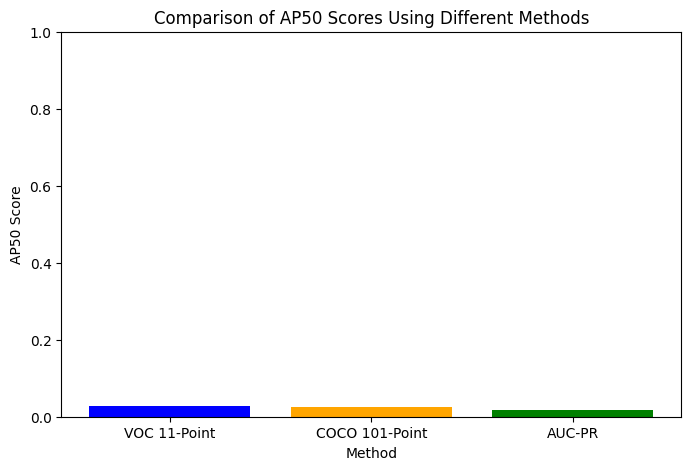

In [69]:
import matplotlib.pyplot as plt
ap50_voc = pascal_11_point(pr_re)
ap50_coco = coco_101_point(pr_re)
ap50_auc = area_under_curve(pr_re)
print(f"VOC 11-Point AP50: {ap50_voc}")
print(f"COCO 101-Point AP50: {ap50_coco}")
print(f"AUC-PR AP50: {ap50_auc}")

# Plot comparison
methods = ['VOC 11-Point', 'COCO 101-Point', 'AUC-PR']
ap_means = [ap50_voc, ap50_coco, ap50_auc]

plt.figure(figsize=(8, 5))
plt.bar(methods, ap_means, color=['blue', 'orange', 'green'])
plt.xlabel("Method")
plt.ylabel("AP50 Score")
plt.title("Comparison of AP50 Scores Using Different Methods")
plt.ylim(0, 1)
plt.show()

Splitting the data into 80-20 train-test split and 10% of train data for validation

In [63]:
import os
import shutil
import random

base_image_dir = "/teamspace/studios/this_studio/data/images"
base_label_dir = "/teamspace/studios/this_studio/data/labels"

split_dirs = ["train", "val", "test"]
for split in split_dirs:
    os.makedirs(os.path.join(base_image_dir, split), exist_ok=True)
    os.makedirs(os.path.join(base_label_dir, split), exist_ok=True)

image_files = [f for f in os.listdir(base_image_dir) if f.endswith(('.jpg', '.png', '.jpeg' , '.tif'))]
random.shuffle(image_files)

train_size = int(0.8 * len(image_files))
train_files = image_files[:train_size]
test_files = image_files[train_size:]

val_size = int(0.1 * len(train_files))
val_files = train_files[:val_size]
train_files = train_files[val_size:]

def move_files(file_list, src_img_dir, dest_img_dir, src_lbl_dir, dest_lbl_dir):
    for file in file_list:
        img_src = os.path.join(src_img_dir, file)
        img_dest = os.path.join(dest_img_dir, file)
        lbl_src = os.path.join(src_lbl_dir, file.replace(os.path.splitext(file)[1], ".txt"))  
        lbl_dest = os.path.join(dest_lbl_dir, os.path.basename(lbl_src))

        if os.path.exists(img_src):
            shutil.move(img_src, img_dest)

        if os.path.exists(lbl_src):
            shutil.move(lbl_src, lbl_dest)

move_files(train_files, base_image_dir, os.path.join(base_image_dir, "train"),
           base_label_dir, os.path.join(base_label_dir, "train"))

move_files(val_files, base_image_dir, os.path.join(base_image_dir, "val"),
           base_label_dir, os.path.join(base_label_dir, "val"))

move_files(test_files, base_image_dir, os.path.join(base_image_dir, "test"),
           base_label_dir, os.path.join(base_label_dir, "test"))

print("Data split completed successfully!")


Data split completed successfully!


In [4]:
import yaml

data = {
    "path": "/teamspace/studios/this_studio/data",
    "train": "images/train",
    "val": "images/val",
    "test": "images/test",
    "names": {0: "solar_panel_0" , 1: "solar_panel_1" , 2 : "solar_panel_2"},
}

with open("/teamspace/studios/this_studio/config.yaml", "w") as file:
    yaml.dump(data, file, default_flow_style=False)


In [1]:
!pip install ultralytics -q

In [6]:
ROOT_DIR = '/teamspace/studios/this_studio/data'

In [8]:
import os
from ultralytics import YOLO

model = YOLO("yolov8n.yaml")
results = model.train(data=os.path.join(ROOT_DIR, "/teamspace/studios/this_studio/config.yaml"), epochs=50 , val = True)

Ultralytics 8.3.78 🚀 Python-3.10.10 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/teamspace/studios/this_studio/config.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

100%|██████████| 755k/755k [00:00<00:00, 91.9MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n summary: 129 layers, 3,011,433 parameters, 3,011,417 gradients, 8.2 GFLOPs

TensorBoard: Start with 'tensorboard --logdir runs/detect/train2', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 176MB/s]


AMP: checks passed ✅


train: Scanning /teamspace/studios/this_studio/data/labels/train... 1830 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1830/1830 [00:01<00:00, 1122.22it/s]


train: New cache created: /teamspace/studios/this_studio/data/labels/train.cache


val: Scanning /teamspace/studios/this_studio/data/labels/val... 203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 203/203 [00:00<00:00, 684.76it/s]

val: New cache created: /teamspace/studios/this_studio/data/labels/val.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.97G      4.275      3.631      3.913         59        640: 100%|██████████| 115/115 [00:19<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]

                   all        203       2641    0.00124      0.011    0.00233    0.00104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.97G      3.193      2.486      2.812        140        640: 100%|██████████| 115/115 [00:17<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.24it/s]

                   all        203       2641      0.717     0.0928     0.0305     0.0101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.89G      2.644      2.004      2.322         95        640: 100%|██████████| 115/115 [00:16<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.21it/s]

                   all        203       2641      0.789     0.0929      0.088     0.0367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.92G      2.376      1.812      2.102        150        640: 100%|██████████| 115/115 [00:16<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.13it/s]

                   all        203       2641      0.817      0.115      0.114     0.0419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.01G      2.166      1.646      1.915         73        640: 100%|██████████| 115/115 [00:16<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.32it/s]

                   all        203       2641      0.886      0.175      0.202     0.0971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.54G      2.067      1.534      1.809        122        640: 100%|██████████| 115/115 [00:16<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.26it/s]

                   all        203       2641      0.911      0.181      0.218      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       2.8G      1.925      1.412      1.686         91        640: 100%|██████████| 115/115 [00:16<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.56it/s]

                   all        203       2641       0.91      0.196      0.219      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.92G      1.835      1.326      1.616         83        640: 100%|██████████| 115/115 [00:16<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.23it/s]

                   all        203       2641      0.913      0.207       0.25      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       3.1G      1.803      1.286       1.57        216        640: 100%|██████████| 115/115 [00:16<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.43it/s]

                   all        203       2641       0.93      0.219      0.254      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.08G      1.708      1.208      1.508         70        640: 100%|██████████| 115/115 [00:16<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.60it/s]

                   all        203       2641      0.936      0.226      0.256      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.15G        1.7      1.191      1.487         43        640: 100%|██████████| 115/115 [00:16<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.44it/s]

                   all        203       2641      0.929      0.227      0.256       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.59G      1.631      1.138       1.45         53        640: 100%|██████████| 115/115 [00:16<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.23it/s]

                   all        203       2641      0.929      0.238      0.262      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.96G      1.573      1.088      1.404         88        640: 100%|██████████| 115/115 [00:16<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.45it/s]

                   all        203       2641      0.934      0.239      0.274      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.76G       1.53      1.044      1.381         94        640: 100%|██████████| 115/115 [00:16<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.46it/s]

                   all        203       2641      0.947      0.251      0.284      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.85G      1.526      1.034      1.362         56        640: 100%|██████████| 115/115 [00:16<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.54it/s]

                   all        203       2641       0.95      0.254      0.284      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.54G      1.489      1.004      1.344        136        640: 100%|██████████| 115/115 [00:16<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.30it/s]

                   all        203       2641      0.954      0.251      0.287      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.39G      1.462     0.9852      1.323         52        640: 100%|██████████| 115/115 [00:16<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.63it/s]

                   all        203       2641      0.962      0.257      0.295      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.09G      1.448     0.9605      1.306         60        640: 100%|██████████| 115/115 [00:16<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.56it/s]

                   all        203       2641      0.958      0.262      0.295      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.68G      1.446     0.9799      1.306         94        640: 100%|██████████| 115/115 [00:16<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.30it/s]

                   all        203       2641       0.95      0.268       0.29      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.01G      1.413     0.9308      1.294         66        640: 100%|██████████| 115/115 [00:16<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.55it/s]

                   all        203       2641      0.959      0.259      0.293       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       3.2G      1.378     0.9299      1.273        113        640: 100%|██████████| 115/115 [00:16<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.56it/s]

                   all        203       2641      0.956      0.268      0.303      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.04G      1.367     0.8906      1.262         57        640: 100%|██████████| 115/115 [00:16<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.60it/s]

                   all        203       2641      0.959      0.273      0.303      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.62G       1.35     0.8908      1.254        135        640: 100%|██████████| 115/115 [00:16<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.60it/s]

                   all        203       2641      0.965      0.266      0.308      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.88G       1.35     0.8734      1.252        118        640: 100%|██████████| 115/115 [00:16<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.44it/s]

                   all        203       2641      0.965       0.28      0.314      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.11G      1.318      0.847      1.221        201        640: 100%|██████████| 115/115 [00:16<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.58it/s]

                   all        203       2641      0.965       0.28      0.318      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.77G        1.3      0.829       1.22        114        640: 100%|██████████| 115/115 [00:16<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.43it/s]

                   all        203       2641      0.961      0.269      0.308      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.78G      1.287     0.8355      1.208        219        640: 100%|██████████| 115/115 [00:16<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.35it/s]

                   all        203       2641      0.966      0.271      0.319      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.69G      1.247     0.7997      1.197         28        640: 100%|██████████| 115/115 [00:16<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.55it/s]

                   all        203       2641      0.967      0.284      0.347       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.25G      1.254     0.8085      1.197        119        640: 100%|██████████| 115/115 [00:16<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.25it/s]

                   all        203       2641      0.634      0.286      0.338      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.91G      1.223     0.7857      1.174        130        640: 100%|██████████| 115/115 [00:16<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.61it/s]

                   all        203       2641      0.964      0.284      0.335      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.71G      1.244     0.7947      1.192         56        640: 100%|██████████| 115/115 [00:16<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.54it/s]

                   all        203       2641      0.635      0.281      0.326      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.22G      1.223     0.7687       1.18        131        640: 100%|██████████| 115/115 [00:16<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.45it/s]

                   all        203       2641      0.971      0.287      0.377      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.89G      1.198     0.7568      1.162         80        640: 100%|██████████| 115/115 [00:16<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.43it/s]

                   all        203       2641      0.635      0.287      0.383      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.05G      1.209     0.7605      1.166        116        640: 100%|██████████| 115/115 [00:16<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.63it/s]

                   all        203       2641      0.634      0.373       0.38      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.8G      1.196      0.748      1.156        125        640: 100%|██████████| 115/115 [00:16<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.53it/s]

                   all        203       2641      0.699      0.375      0.424      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.81G      1.174     0.7348      1.149        103        640: 100%|██████████| 115/115 [00:16<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.28it/s]

                   all        203       2641      0.818      0.373      0.466      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.95G      1.195     0.7504      1.157         75        640: 100%|██████████| 115/115 [00:16<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.64it/s]

                   all        203       2641      0.623      0.381      0.398      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.56G      1.155     0.7255      1.145        113        640: 100%|██████████| 115/115 [00:16<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.70it/s]

                   all        203       2641      0.647      0.454      0.411      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       3.1G      1.146     0.7151      1.138         77        640: 100%|██████████| 115/115 [00:16<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.23it/s]

                   all        203       2641       0.57      0.452      0.422       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.86G      1.141     0.7173      1.128         60        640: 100%|██████████| 115/115 [00:16<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.64it/s]

                   all        203       2641      0.645      0.436       0.41      0.299


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.63G      1.073     0.6742      1.117         38        640: 100%|██████████| 115/115 [00:17<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.54it/s]

                   all        203       2641      0.894      0.429      0.475      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.54G      1.061     0.6625      1.102        119        640: 100%|██████████| 115/115 [00:16<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.65it/s]

                   all        203       2641      0.559      0.538      0.479      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.81G      1.051     0.6567      1.101         28        640: 100%|██████████| 115/115 [00:16<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.36it/s]

                   all        203       2641      0.555      0.511      0.446      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.58G      1.033     0.6485      1.085         41        640: 100%|██████████| 115/115 [00:16<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.63it/s]

                   all        203       2641      0.596      0.431      0.452      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.52G      1.037     0.6511      1.096        113        640: 100%|██████████| 115/115 [00:16<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.68it/s]

                   all        203       2641      0.484      0.454      0.429      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.29G      1.021     0.6323      1.085         87        640: 100%|██████████| 115/115 [00:16<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.65it/s]

                   all        203       2641      0.551      0.454      0.468      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.57G      1.015     0.6295      1.078         86        640: 100%|██████████| 115/115 [00:16<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.55it/s]

                   all        203       2641      0.492      0.516      0.495      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.56G      1.003     0.6225      1.075         62        640: 100%|██████████| 115/115 [00:16<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.37it/s]

                   all        203       2641       0.67      0.516      0.507      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.34G     0.9899     0.6179      1.068         72        640: 100%|██████████| 115/115 [00:16<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.57it/s]

                   all        203       2641      0.581      0.484      0.495      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.54G     0.9751      0.611      1.063         25        640: 100%|██████████| 115/115 [00:16<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.67it/s]

                   all        203       2641      0.624      0.515      0.527      0.403



50 epochs completed in 0.259 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.10.10 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]


                   all        203       2641      0.627      0.515      0.527      0.403
         solar_panel_0        203       2616      0.772      0.946      0.952      0.737
         solar_panel_1         10         14      0.629      0.143      0.233      0.205
         solar_panel_2         11         11      0.479      0.455      0.395      0.267
Speed: 0.3ms preprocess, 1.9ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to runs/detect/train2


Both train and val loss are converging

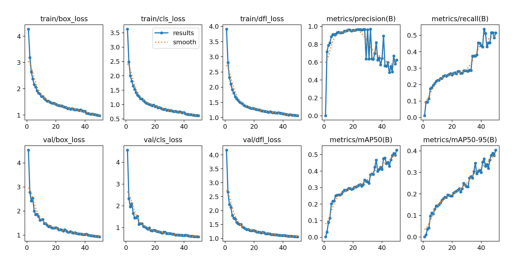

In [1]:
import matplotlib.pyplot as plt
import cv2

# Path to the PNG file
image_path = "/teamspace/studios/this_studio/runs/detect/train2/results.png"

# Read the image using OpenCV
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Display using Matplotlib
plt.imshow(image)
plt.axis("off")  # Hide axes
plt.show()


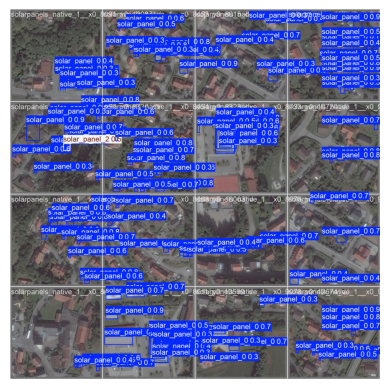

In [5]:
image = cv2.imread('/teamspace/studios/this_studio/runs/detect/train2/val_batch2_pred.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
plt.imshow(image)
plt.axis("off")  
plt.show()


In [87]:
import os
from ultralytics import YOLO
weights_path =  "/teamspace/studios/this_studio/best.pt" 
model = YOLO(weights_path)



image 1/1 /teamspace/studios/this_studio/data/images/test/solarpanels_native_1__x0_0_y0_7950_dxdy_416.tif: 640x640 8 solar_panel_0s, 5.9ms
Speed: 5.9ms preprocess, 5.9ms inference, 352.6ms postprocess per image at shape (1, 3, 640, 640)


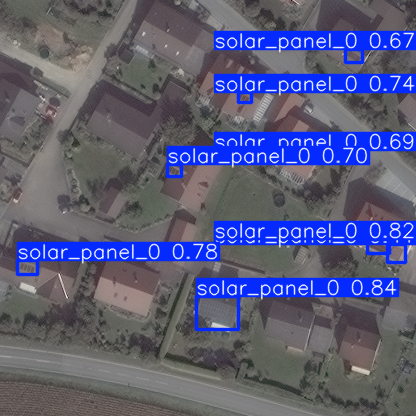

In [2]:
results = model("/teamspace/studios/this_studio/data/images/test/solarpanels_native_1__x0_0_y0_7950_dxdy_416.tif")  
results[0].show()

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import numpy as np

def show_results(image_path , model ):
    GT_COLOR = "green"   
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    fig, ax = plt.subplots(1, figsize=(10, 8))
    ax.imshow(image)  
    results = model(image_path)
    labels = label_df[label_df['name'] == os.path.splitext(image_path.split('/')[-1])[0]]['labels']
    classes = label_df[label_df['name'] == os.path.splitext(image_path.split('/')[-1])[0]]['classes']
    for result in results:   ## For predicted boxes
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  
            class_id = int(box.cls[0])  
            label = f"Pred: {result.names[class_id]}" 
            rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor=PRED_COLOR, facecolor="none")
            ax.add_patch(rect)
            ax.text(x1, y1 - 5, label, color="red" , fontsize=10, backgroundcolor="white")

    for i in range(len(labels)):  ## for Ground truth
        class_id = classes[i]
        x , y , w , h = labels[i]
        width, height = image.shape[1], image.shape[0]
        x_min , y_min , x_max , y_max = computing_end_points((x,y,w,h))
        x1 = int(x_min * width)
        y1 = int(y_min * height)
        x2 = int(x_max * width)
        y2 = int(y_max * height)
        label = f"GT: {result.names[int(class_id)]}"  
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor="green" , facecolor="none")
        ax.add_patch(rect)
        ax.text(x1, y1 - 5, label, color="green" , fontsize=10, backgroundcolor="white")
    plt.axis("off") 
    plt.show()



image 1/1 /teamspace/studios/this_studio/data/images/test/solarpanels_native_1__x0_0_y0_7950_dxdy_416.tif: 640x640 8 solar_panel_0s, 5.6ms
Speed: 1.8ms preprocess, 5.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


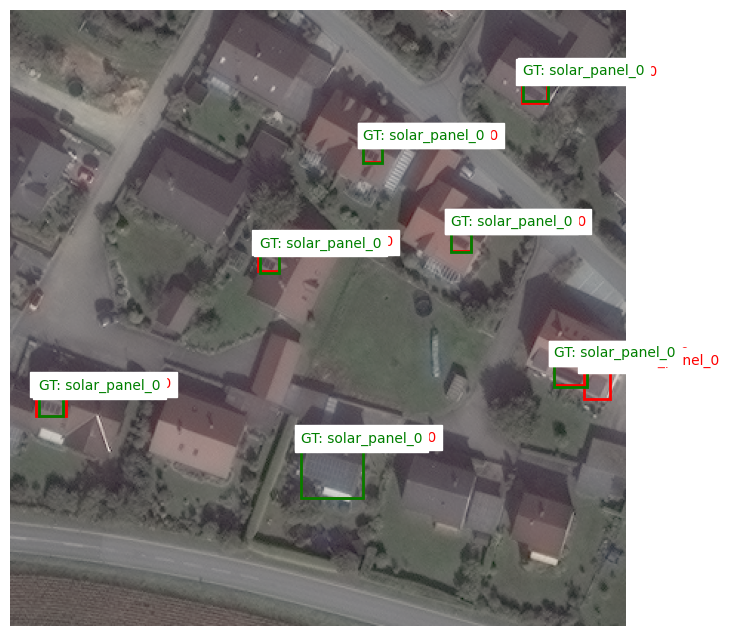

In [4]:
show_results("/teamspace/studios/this_studio/data/images/test/solarpanels_native_1__x0_0_y0_7950_dxdy_416.tif" , model , "/teamspace/studios/this_studio/data/labels/test/solarpanels_native_1__x0_0_y0_7950_dxdy_416.txt")


image 1/1 /teamspace/studios/this_studio/data/images/test/solarpanels_native_1__x0_41_y0_7970_dxdy_416.tif: 640x640 7 solar_panel_0s, 104.2ms
Speed: 2.4ms preprocess, 104.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


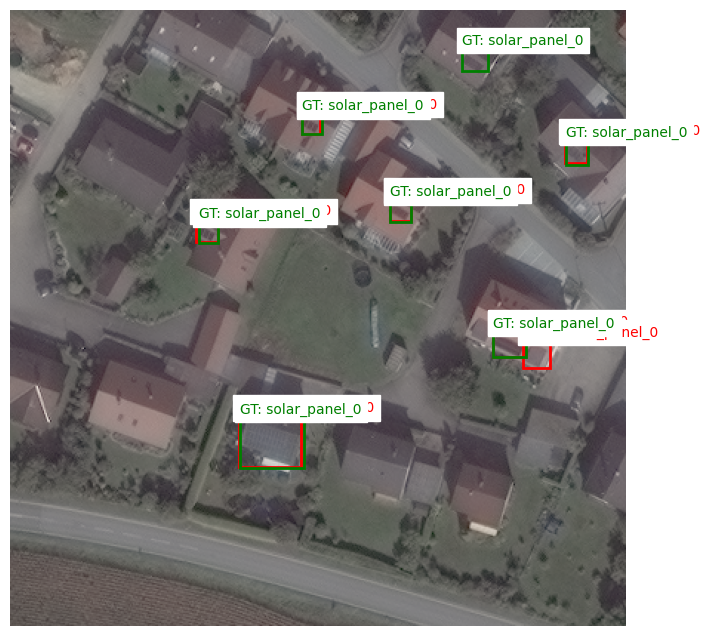

In [14]:
show_results("/teamspace/studios/this_studio/data/images/test/solarpanels_native_1__x0_41_y0_7970_dxdy_416.tif" , model , "/teamspace/studios/this_studio/data/labels/test/solarpanels_native_1__x0_41_y0_7970_dxdy_416.txt")


image 1/1 /teamspace/studios/this_studio/data/images/test/solarpanels_native_1__x0_351_y0_8077_dxdy_416.tif: 640x640 7 solar_panel_0s, 6.3ms
Speed: 1.9ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


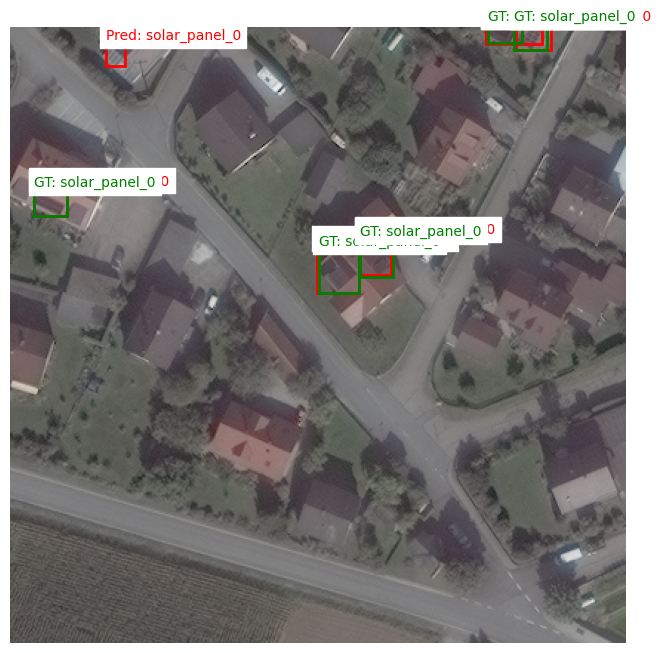

In [5]:
show_results("/teamspace/studios/this_studio/data/images/test/solarpanels_native_1__x0_351_y0_8077_dxdy_416.tif" , model , "/teamspace/studios/this_studio/data/labels/test/solarpanels_native_1__x0_351_y0_8077_dxdy_416.txt")


image 1/1 /teamspace/studios/this_studio/data/images/test/solarpanels_native_1__x0_1052_y0_7606_dxdy_416.tif: 640x640 17 solar_panel_0s, 100.9ms
Speed: 3.1ms preprocess, 100.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


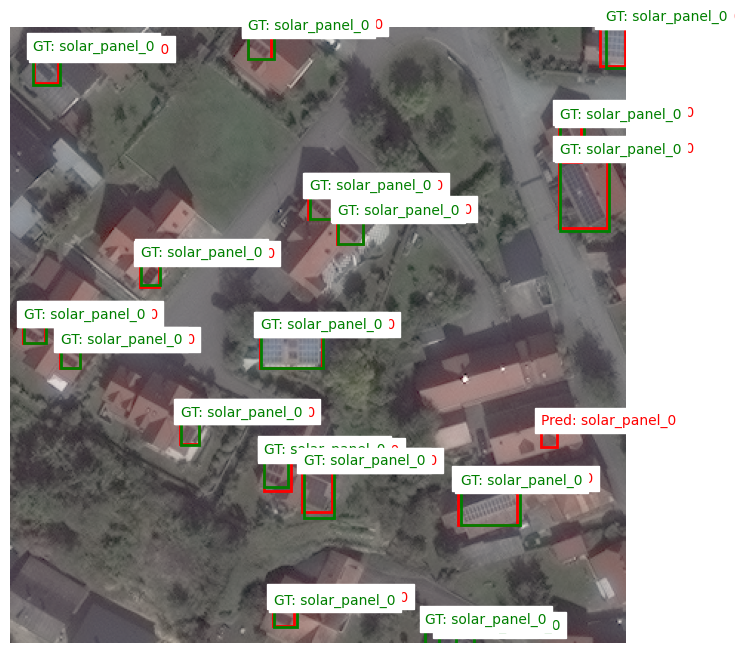

In [15]:
show_results("/teamspace/studios/this_studio/data/images/test/solarpanels_native_1__x0_1052_y0_7606_dxdy_416.tif" , model , "/teamspace/studios/this_studio/data/labels/test/solarpanels_native_1__x0_1052_y0_7606_dxdy_416.txt")

Computing mAp50 using supervision

In [6]:
import supervision as sv
from supervision.metrics import MeanAveragePrecision
import cv2
image_path = "/teamspace/studios/this_studio/data/images/test/solarpanels_native_1__x0_1052_y0_7606_dxdy_416.tif"
label_path = "/teamspace/studios/this_studio/data/labels/test/solarpanels_native_1__x0_1052_y0_7606_dxdy_416.txt"
image = cv2.imread(image_path)
height, width, _ = image.shape
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

results = model(image_path)
predictions = []
pred_conf = []
pred_class_id = []
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(float, box.xyxy[0])
        conf = float(box.conf[0])
        class_id = int(box.cls[0])
        predictions.append([x1, y1, x2, y2])
        pred_conf.append(conf)
        pred_class_id.append(class_id)

pred = sv.Detections(
    xyxy=np.array(predictions),  
    confidence=np.array(pred_conf),  
    class_id=np.array(pred_class_id)  
)

ground_truths = []
labels = label_df[label_df['name'] == os.path.splitext(image_path.split('/')[-1])[0]]['labels']
ground_class_id = label_df[label_df['name'] == os.path.splitext(image_path.split('/')[-1])[0]]['classes']
for i in labels:
    x, y, w, h = i
    x_min , y_min , x_max , y_max = computing_end_points((x,y,w,h))
    x1 = int(x_min * width)
    y1 = int(y_min * height)
    x2 = int(x_max * width)
    y2 = int(y_max * height)
    ground_truths.append([x1, y1, x2, y2])

gt = sv.Detections(
    xyxy=np.array(ground_truths),  
    confidence=np.ones(len(ground_truths)),  
    class_id=np.array(ground_class_id) 
)
map_metric = MeanAveragePrecision()
map_metric.update(
    predictions=pred,
    targets=gt,
)

map_result = map_metric.compute()  




image 1/1 /teamspace/studios/this_studio/data/images/test/solarpanels_native_1__x0_1052_y0_7606_dxdy_416.tif: 640x640 16 solar_panel_0s, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


In [8]:
map_result.map50

0.8811881188118811

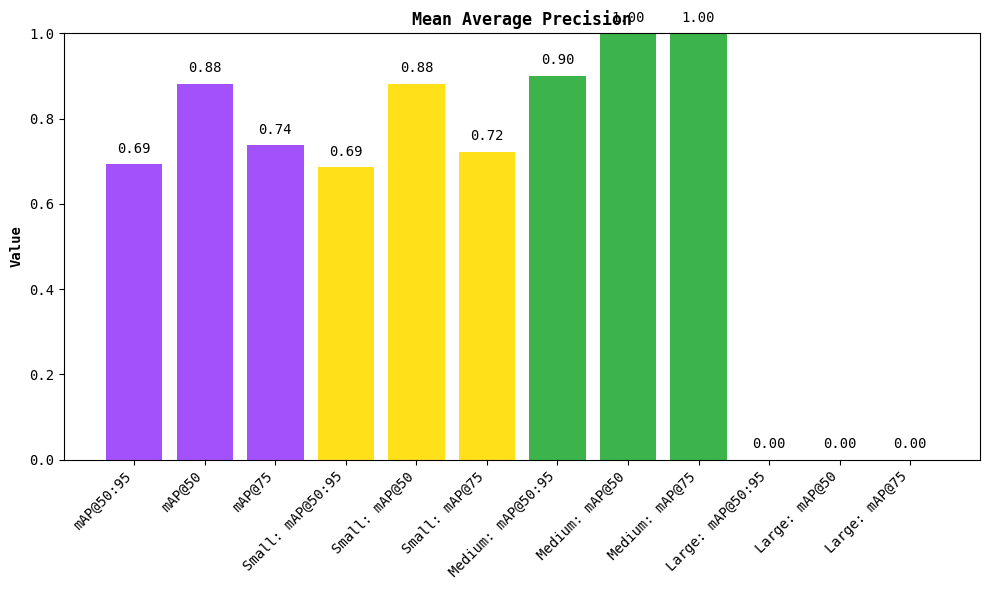

In [9]:
import matplotlib.pyplot as plt

map_result.plot()
plt.show()

In [10]:
predictions

[[370.98699951171875,
  89.5708236694336,
  403.12091064453125,
  135.69776916503906],
 [169.24929809570312,
  207.66050720214844,
  210.0926513671875,
  230.1446990966797],
 [303.8882141113281, 313.6739501953125, 342.858154296875, 335.5138854980469],
 [221.2769317626953,
  131.71844482421875,
  237.87533569335938,
  146.0170135498047],
 [197.83096313476562,
  300.6664123535156,
  219.85899353027344,
  332.1766357421875],
 [201.89613342285156,
  114.88713836669922,
  217.65203857421875,
  128.74192810058594],
 [160.5703125, 5.8474273681640625, 177.58084106445312, 20.605440139770508],
 [33.770912170410156,
  218.48294067382812,
  47.114784240722656,
  230.66282653808594],
 [170.7536163330078, 291.8511962890625, 186.94557189941406, 309.7908935546875],
 [15.882002830505371,
  21.04122543334961,
  32.392059326171875,
  36.455833435058594],
 [114.97554779052734,
  267.7913818359375,
  127.10002899169922,
  281.5949401855469],
 [397.8183288574219, 0.0, 416.0, 24.54337501525879],
 [88.4288024

In [11]:
pred_class_id

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [12]:
pred_conf

[0.8761106729507446,
 0.8662446141242981,
 0.851273238658905,
 0.8358364105224609,
 0.8195357918739319,
 0.812645435333252,
 0.8035516142845154,
 0.7871951460838318,
 0.7777557969093323,
 0.7715020179748535,
 0.7173699140548706,
 0.7013814449310303,
 0.692710816860199,
 0.6290587782859802,
 0.5761817097663879,
 0.41882744431495667]

In [13]:
for i in range(len(pred_conf)):
    predictions[i].append(pred_conf[i])

In [14]:
predictions

[[370.98699951171875,
  89.5708236694336,
  403.12091064453125,
  135.69776916503906,
  0.8761106729507446],
 [169.24929809570312,
  207.66050720214844,
  210.0926513671875,
  230.1446990966797,
  0.8662446141242981],
 [303.8882141113281,
  313.6739501953125,
  342.858154296875,
  335.5138854980469,
  0.851273238658905],
 [221.2769317626953,
  131.71844482421875,
  237.87533569335938,
  146.0170135498047,
  0.8358364105224609],
 [197.83096313476562,
  300.6664123535156,
  219.85899353027344,
  332.1766357421875,
  0.8195357918739319],
 [201.89613342285156,
  114.88713836669922,
  217.65203857421875,
  128.74192810058594,
  0.812645435333252],
 [160.5703125,
  5.8474273681640625,
  177.58084106445312,
  20.605440139770508,
  0.8035516142845154],
 [33.770912170410156,
  218.48294067382812,
  47.114784240722656,
  230.66282653808594,
  0.7871951460838318],
 [170.7536163330078,
  291.8511962890625,
  186.94557189941406,
  309.7908935546875,
  0.7777557969093323],
 [15.882002830505371,
  21

In [15]:
final_pred = {}

In [16]:
for i in range(len(pred_class_id)):
    if pred_class_id[i] not in final_pred:
        final_pred[pred_class_id[i]] = []
    final_pred[pred_class_id[i]].append(predictions[i])


In [17]:
final_pred

{0: [[370.98699951171875,
   89.5708236694336,
   403.12091064453125,
   135.69776916503906,
   0.8761106729507446],
  [169.24929809570312,
   207.66050720214844,
   210.0926513671875,
   230.1446990966797,
   0.8662446141242981],
  [303.8882141113281,
   313.6739501953125,
   342.858154296875,
   335.5138854980469,
   0.851273238658905],
  [221.2769317626953,
   131.71844482421875,
   237.87533569335938,
   146.0170135498047,
   0.8358364105224609],
  [197.83096313476562,
   300.6664123535156,
   219.85899353027344,
   332.1766357421875,
   0.8195357918739319],
  [201.89613342285156,
   114.88713836669922,
   217.65203857421875,
   128.74192810058594,
   0.812645435333252],
  [160.5703125,
   5.8474273681640625,
   177.58084106445312,
   20.605440139770508,
   0.8035516142845154],
  [33.770912170410156,
   218.48294067382812,
   47.114784240722656,
   230.66282653808594,
   0.7871951460838318],
  [170.7536163330078,
   291.8511962890625,
   186.94557189941406,
   309.7908935546875,
  

In [18]:
ground_truths

[[160.0, 6.0, 178.0, 21.0],
 [9.000000000000002, 201.0, 24.0, 213.99999999999997],
 [34.0, 218.00000000000006, 47.0, 230.0],
 [88.00000000000001, 159.0, 101.00000000000001, 174.0],
 [115.0, 267.0, 127.00000000000001, 282.0],
 [15.000000000000002, 20.0, 33.0, 39.0],
 [202.00000000000003, 114.00000000000001, 217.0, 129.0],
 [221.0, 131.00000000000003, 238.0, 146.0],
 [169.00000000000003, 208.0, 211.00000000000003, 230.0],
 [371.0, 66.0, 387.00000000000006, 90.0],
 [371.0, 90.00000000000001, 404.00000000000006, 137.00000000000003],
 [402.0, 0.0, 416.0, 27.000000000000004],
 [304.0, 313.00000000000006, 344.0, 336.0],
 [289.00000000000006, 411.0, 313.00000000000006, 416.0],
 [280.0, 407.00000000000006, 301.0, 416.0],
 [171.00000000000003, 292.0, 187.0, 310.00000000000006],
 [198.0, 300.0, 218.0, 331.0],
 [178.0, 394.00000000000006, 193.0, 405.00000000000006]]

In [19]:
ground_class_id = [int(g) for g in ground_class_id]

In [20]:
final_gt = {}
for i in range(len(ground_class_id)):
    if ground_class_id[i] not in final_gt:
        final_gt[ground_class_id[i]] = []
    final_gt[ground_class_id[i]].append(ground_truths[i])


In [29]:
pr , re , f1 = comp_prec_rec( [final_pred] ,[final_gt], 0.5)

In [30]:
pr

{0: array([          1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1])}

In [31]:
re

{0: array([   0.055556,     0.11111,     0.16667,     0.22222,     0.27778,     0.33333,     0.38889,     0.44444,         0.5,     0.55556,     0.61111,     0.66667,     0.72222,     0.77778,     0.83333,     0.88889])}

In [32]:
f1

{0: array([    0.10526,         0.2,     0.28571,     0.36364,     0.43478,         0.5,        0.56,     0.61538,     0.66667,     0.71429,     0.75862,         0.8,     0.83871,       0.875,     0.90909,     0.94118])}

In [33]:
all_pascal= []
all_coco = []
all_auc = []
for cls in pr.keys():
    pr_re = [(0,0)] + list(zip(pr[cls],re[cls]))
    all_pascal.append(pascal_11_point(pr_re))
    all_coco.append(coco_101_point(pr_re))
    all_auc.append(area_under_curve(pr_re))
map50_pascal = np.mean(all_pascal)
map50_coco = np.mean(all_coco)
map50_auc = np.mean(all_auc)
print(f'map50_pascal : {map50_pascal}')
print(f'map50_coco : {map50_coco}')
print(f'map50_auc : {map50_auc}')



map50_pascal : 0.8181818181818182
map50_coco : 0.8811881188118812
map50_auc : 0.8888888888888888


mAp50 usign coco 101 point interpolation method very closely matches the supervison computed mAp50 score

In [1]:
!pip install supervision 

Making the supervision dataset

In [9]:
import supervision as sv
import numpy as np
import cv2
import os
classes = ["solar_panel_0", "solar_panel_1", "solar_panel_2"] 
images = {}  
annotations = {} 
base_path = "/teamspace/studios/this_studio/data/images/test"
image_paths = os.listdir(base_path)

for image_path in image_paths:
    image = cv2.imread(os.path.join(base_path,image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_name = image_path
    images[image_name] = image
    height, width = image.shape[:2]
    boxes = []
    labels = label_df.loc[label_df["name"] == os.path.splitext(image_path)[0] , "labels"].values[0]
    class_ids = label_df.loc[label_df["name"] == os.path.splitext(image_path)[0] , "classes"].values[0]
    for label in labels:
                x_center, y_center, w, h = label
                x_min , y_min , x_max , y_max = computing_end_points((x,y,w,h))
                x1 = int(x_min * width)
                y1 = int(y_min * height)
                x2 = int(x_max * width)
                y2 = int(y_max * height)
                boxes.append([x1, y1, x2, y2])
    
    detections = sv.Detections(
        xyxy=np.array(boxes),  
        class_id=np.array(class_ids)  
    )
    annotations[image_name] = detections

dataset = sv.DetectionDataset(
    classes=classes,
    images=images,
    annotations=annotations
)

SupervisionWarnings: Passing a `Dict[str, np.ndarray]` into `DetectionDataset` is deprecated and will be removed in `supervision-0.26.0`. Use a list of paths `List[str]` instead.


Confusion Matrix on the Test data

In [ ]:
import supervision as sv
from ultralytics import YOLO
import numpy as np


def callback(image: np.ndarray) -> sv.Detections:
    result = model(image)[0]
    return sv.Detections.from_ultralytics(result)

confusion_matrix = sv.ConfusionMatrix.benchmark(
    dataset = dataset,
    callback = callback
)

confusion_matrix.plot()

In [44]:
confusion_matrix

ConfusionMatrix(matrix=array([[       5805,           0,           0,         263],
       [          4,          14,           0,           7],
       [          4,           0,          33,           8],
       [        483,           4,           3,           0]]), classes=['solar_panel_0', 'solar_panel_1', 'solar_panel_2'], conf_threshold=0.3, iou_threshold=0.5)

In [45]:
confusion_matrix.matrix

array([[       5805,           0,           0,         263],
       [          4,          14,           0,           7],
       [          4,           0,          33,           8],
       [        483,           4,           3,           0]])

Computing the precision , recall and f1 score at diff iou and confidence thresholds

In [ ]:
import pandas as pd
import numpy as np
import supervision as sv
iou_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
conf_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]

data = []

for iou_thresh in iou_thresholds:
    row = []
    for conf_thresh in conf_thresholds:
        def callback(image: np.ndarray) -> sv.Detections:
            result = model(image,conf=conf_thresh, iou=iou_thresh)[0]
            return sv.Detections.from_ultralytics(result)

        confusion_matrix = sv.ConfusionMatrix.benchmark(
            dataset = dataset,
            callback = callback
        )

        arr = confusion_matrix.matrix
        tp = np.diag(arr).sum()
        fp = np.sum(arr[-1,:-1])
        fn = np.sum(arr[:-1,-1])

        precision = tp / (tp + fp) 
        recall = tp / (tp + fn) 
        f1_score = 2*(precision*recall) / (precision + recall) 

        row.append(f"Prec: {precision}, Rec: {recall}, F1: {f1_score}")

    data.append(row)

df = pd.DataFrame(data, index=[f"IoU {iou}" for iou in iou_thresholds], columns=[f"Conf {conf}" for conf in conf_thresholds])


In [11]:
df

Conf 0.1                         Conf 0.3  \
IoU 0.1  Prec: 0.96, Rec: 0.79, F1: 0.87  Prec: 0.96, Rec: 0.79, F1: 0.87   
IoU 0.3  Prec: 0.96, Rec: 0.90, F1: 0.93  Prec: 0.96, Rec: 0.90, F1: 0.93   
IoU 0.5  Prec: 0.96, Rec: 0.94, F1: 0.95  Prec: 0.96, Rec: 0.94, F1: 0.95   
IoU 0.7  Prec: 0.92, Rec: 0.95, F1: 0.94  Prec: 0.92, Rec: 0.95, F1: 0.94   
IoU 0.9  Prec: 0.59, Rec: 0.96, F1: 0.73  Prec: 0.59, Rec: 0.96, F1: 0.73   

                                Conf 0.5                         Conf 0.7  \
IoU 0.1  Prec: 0.98, Rec: 0.76, F1: 0.86  Prec: 1.00, Rec: 0.68, F1: 0.81   
IoU 0.3  Prec: 0.99, Rec: 0.87, F1: 0.92  Prec: 1.00, Rec: 0.78, F1: 0.88   
IoU 0.5  Prec: 0.99, Rec: 0.91, F1: 0.95  Prec: 1.00, Rec: 0.82, F1: 0.90   
IoU 0.7  Prec: 0.98, Rec: 0.92, F1: 0.95  Prec: 1.00, Rec: 0.82, F1: 0.90   
IoU 0.9  Prec: 0.72, Rec: 0.93, F1: 0.81  Prec: 0.88, Rec: 0.83, F1: 0.85   

                                Conf 0.9  
IoU 0.1  Prec: 1.00, Rec: 0.17, F1: 0.29  
IoU 0.3  Prec: 1.00, Rec: 0.20, F1: 0.34  
IoU 0.5  Prec: 1.00, Rec: 0.22, F1: 0.37  
IoU 0.7  Prec: 1.00, Rec: 0.23, F1: 0.37  
IoU 0.9  Prec: 0.98, Rec: 0.23, F1: 0.37

In [12]:
df.to_csv('iou_conf_new.csv')

for hosting in gradio

In [86]:
!pip install gradio -q

In [90]:
import torch
import cv2
import gradio as gr
import numpy as np
from ultralytics import YOLO

def detect_objects(image):
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    results = model(image)

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0].item()
            label = result.names[int(box.cls[0])]

            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, f"{label} {conf:.2f}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

iface = gr.Interface(
    fn=detect_objects,
    inputs=gr.Image(type="pil"),
    outputs=gr.Image(type="numpy"),
    title="YOLOv8 Solar Panels Detection",
    description="Upload an image and detect solar panels using YOLOv8."
)

iface.launch(share = True)


* Running on local URL:  http://127.0.0.1:7862
* Running on public URL: https://bbe5fe0e745e8ae2c3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
